WELCOME TO THE MACHINE...



Initial Weights:
[[0.06488812 0.74251507 0.63527206 0.97943491 0.98717346 0.56530321]
 [0.30221759 0.88304749 0.78218199 0.56723952 0.70721655 0.14308153]
 [0.49195445 0.85931669 0.78957197 0.96672846 0.40853821 0.79648729]
 [0.41500284 0.5292716  0.98154227 0.86123107 0.20404369 0.19408286]]
Final Weights:

[[  0.14040972   0.91190693   1.14240792   5.00183886   1.63824513
    0.41655212]
 [ -6.79620502  -0.22590765 -11.47195879  -9.69576047   3.07824627
   -0.3612709 ]
 [ 18.37481142   4.55530853  33.66479348  25.52661668  -2.70898117
    1.27985754]
 [ 22.292628     5.68175384  41.90764985  28.6018641   -2.59221157
    0.86843838]]
Output: 
[[9.95282345e-01 1.26889207e-02 1.28415205e-09]
 [9.94092406e-01 1.62311279e-02 1.77537677e-09]
 [9.95248805e-01 1.27437447e-02 1.33310739e-09]
 [9.94026907e-01 1.63249710e-02 1.80768622e-09]
 [9.95549374e-01 1.18787724e-02 1.18805842e-09]
 [9.89248124e-01 3.06064974e-02 3.58937289e-09]
 [9.93575727e-01 1.75249013e-02

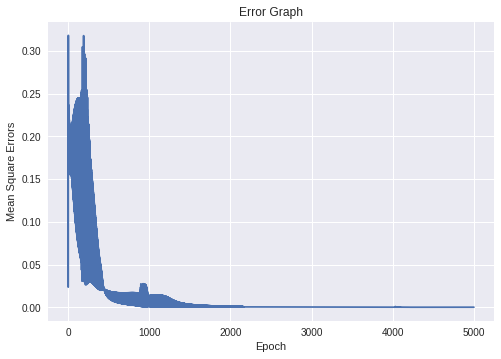

Final Mean Squared Error : 7.406567102360393e-05

THE MODEL HAS BEEN TRAINED!

Input your features for testing....

1
0
1
1


[[2.62147829e-10 1.18497755e-06 9.99999925e-01]]


In [0]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import normalize
from keras.utils import np_utils

iris = load_iris()

x = iris.data
Y = iris.target

X=normalize(x,axis=0)

y=np_utils.to_categorical(Y,num_classes=3)


#print("Examples of X_normalised\n",X_normalized[:3])


"""excel_file = 'TestNN.xlsx'
sheet1 = pd.read_excel(excel_file,skiprows=0)

sheet2 = pd.read_excel(excel_file,sheet_name=1)

y = np.array(pd.concat([sheet2]))

X = np.array(pd.concat([sheet1]))"""

#Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))
    

#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)

#Forward Propogation
def forward_prop(X):
    
    hidden_layer_input1 = np.dot(X,wh)
    hidden_layer_input = hidden_layer_input1 + bh                   #O/P = (i/p*weight) + bias
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    
    output_layer_input1=np.dot(hiddenlayer_activations,wout)
    output_layer_input= output_layer_input1+ bout
    output = sigmoid(output_layer_input)
    
    return output,hiddenlayer_activations


#Variable initialization
epoch=5000    #Setting training iterations
lr=0.1        #Setting learning rate
inputlayer_neurons = X.shape[1] #number of features in each data set i.e., (4) 

hiddenlayer_neurons = 6 #number of hidden layers neurons
output_neurons = 3 #number of neurons at output layer

#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons)) #Creates a matrix of order (m x n)
bh=np.random.uniform(size=(1,hiddenlayer_neurons))                  #i.e. Creating Weight & Bias matrices
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

print("WELCOME TO THE MACHINE...\n\n\n")

print("Initial Weights:")
print(wh)

mse_list = []
i_list = []

for i in range(epoch):
    #Forward Propogation
    output,hiddenlayer_activations = forward_prop(X)


    #Backpropagation
    E = y-output
    slope_output_layer = derivatives_sigmoid(output)
    slope_hidden_layer = derivatives_sigmoid(hiddenlayer_activations)
    d_output = E * slope_output_layer           #Delta output
    Error_at_hidden_layer = d_output.dot(wout.T)              # Formula : error =d_output*(w_outTranspose)
    
    
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer        
    wout += hiddenlayer_activations.T.dot(d_output) *lr
    bout += np.sum(d_output, axis=0,keepdims=True) *lr          
    wh += X.T.dot(d_hiddenlayer) *lr
    bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
    
    i_list.append(i)
    
    err = np.absolute(np.array(y) - np.array(output))
    
    sum=0
    for i in range(0,3):
        for j in range(0,2):
            sum+=(err[i][j])*(err[i][j])        #Finding MSE

    mse = sum/9;
    mse_list.append(mse)
    

print('Final Weights:\n')
print(wh)

print("Output: \n"+str(output)+"\n")



for i in range(0,3):
    if(output[i][0] > 0.5):
        print("Sample "+str(i+1)+" belongs to Class - 1")
    else:
        print("Sample "+str(i+1)+" belongs to Class - 2")

print('\n\nAbsolute Errors:\n')
err = np.absolute(np.array(y) - np.array(output))
print(err)

plt.plot(i_list,mse_list)

plt.xlabel('Epoch')
plt.ylabel('Mean Square Errors')
plt.title('Error Graph')
plt.show()


sum=0
for i in range(0,3):
    for j in range(0,2):
        sum+=(err[i][j])*(err[i][j])

mse = sum/9;
print("Final Mean Squared Error : "+str(mse))
print("\nTHE MODEL HAS BEEN TRAINED!\n\nInput your features for testing....\n")

m=1
n=4
ex = [[0 for j in range(n)] for i in range(m)]  #Initialization

for i in range(0,m):
    for j in range(0,n):
        ex[i][j] = int(input())
    

output,hl = forward_prop(ex)

print("\n")
print(output)

